In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd,diagsvd

In [115]:
df = pd.read_csv('archive/ratings_small.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [116]:
mean = df["rating"].mean()
Matriz_A = df.pivot_table(index='userId', columns='movieId', values='rating')
Matriz_A = Matriz_A.fillna(mean)
Matriz_A.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,...,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608
2,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,4.000000,...,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608
3,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,...,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608
4,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,4.000000,...,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608
5,3.543608,3.543608,4.000000,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,...,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608,3.543608


In [117]:
Matriz_A.shape

(671, 9066)

In [118]:
# Aleatorizando um filme
random_line = np.random.randint(0,df.shape[0])
random_line_movieid = df.loc[random_line]["movieId"].astype(int)
random_line_movierating = df.loc[random_line]["rating"].astype(float)
random_line_movieuser = df.loc[random_line]["userId"].astype(int)
random_float = np.random.uniform(0,5)



print(f"Colocando valor estragado {random_float} na posicao ({random_line_movieid}, {random_line_movieuser})")

Matriz_B = Matriz_A.copy()
Matriz_B.loc[random_line_movieuser,random_line_movieid] = random_float
Matriz_B = Matriz_B.to_numpy()
u,s,vt = svd(Matriz_B,full_matrices=False)

s[-80:] = 0

sigma = diagsvd(s, u.shape[0], vt.shape[0])

Matriz_B = u @ sigma @ vt

print(f"Valor original: {random_line_movierating}")

print(f"Valor recuperado: {Matriz_B[random_line_movieuser,random_line_movieid]}")

Colocando valor estragado 2.590727097270862 na posicao (1022, 358)
Valor original: 4.0
Valor recuperado: 3.538781269442952


In [119]:
def test_100():
    # Aleatorizando um filme
    erros = []
    for i in range(100):
        Matriz_B = Matriz_A.copy()
        Matriz_B = Matriz_B.to_numpy()

        # Pick random element
        random_line = np.random.randint(0,df.shape[0])
        random_line_movieid = df.loc[random_line]["movieId"].astype(int)
        random_line_movierating = df.loc[random_line]["rating"].astype(float)
        random_line_user = df.loc[random_line]["userId"].astype(int)
        random_float = np.random.uniform(0,5)

        

        # Get index of user in df
        index = Matriz_A.index.get_loc(random_line_user)

        # Getting the index of the movie in the df
        index_movie = Matriz_A.columns.get_loc(random_line_movieid)

        # Changing the value in the matrix
        Matriz_B[index,index_movie] = random_float

        u,s,vt = svd(Matriz_B,full_matrices=False)

        s[-630:] = 0

        sigma = diagsvd(s, u.shape[0], vt.shape[0])

        Matriz_B = u @ sigma @ vt
        erros.append(np.abs(Matriz_B[index,index_movie] - random_line_movierating))
        
    return erros

erros = test_100()
erros_media = np.mean(erros)
erros_desvio = np.std(erros)
print(f"Media dos erros: {erros_media}")
print(f"Desvio dos erros: {erros_desvio}")


Media dos erros: 1.0234262878678364
Desvio dos erros: 0.7609409682522214


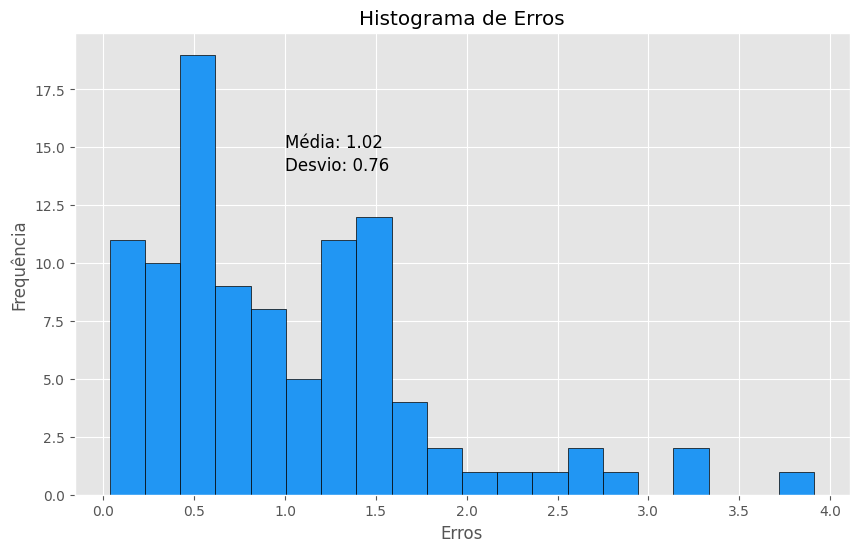

In [120]:
#criando o histograma de erros
plt.figure(figsize=(10,6))
plt.hist(erros, bins=20, ec='black', color='#2196f3')
plt.title('Histograma de Erros')
plt.xlabel('Erros')
plt.ylabel('Frequência')
#create labels in the graph
plt.text(1, 15, f'Média: {erros_media:.2f}', fontsize=12)
plt.text(1, 14, f'Desvio: {erros_desvio:.2f}', fontsize=12)
plt.show()

In [ ]:
def test_carga(n_val):
    # Aleatorizando um filme
    erros = []
    for i in range(100):
        Matriz_B = Matriz_A.copy()
        Matriz_B = Matriz_B.to_numpy()

        randomized = []
        # Pick random element
        sample = df.sample(n_val)
        for i in range(n_val):
            random_line_movieid = sample.iloc[i]["movieId"].astype(int)
            random_line_movierating = sample.iloc[i]["rating"].astype(float)
            random_line_user = sample.iloc[i]["userId"].astype(int)
            random_float = np.random.uniform(0,5)

            # Get index of user in df
            index = Matriz_A.index.get_loc(random_line_user)

            # Getting the index of the movie in the df
            index_movie = Matriz_A.columns.get_loc(random_line_movieid)

            # Changing the value in the matrix
            Matriz_B[index,index_movie] = random_float

            randomized.append([index,index_movie,random_line_movierating, random_float])

        u,s,vt = svd(Matriz_B,full_matrices=False)

        s[-630:] = 0

        sigma = diagsvd(s, u.shape[0], vt.shape[0])

        Matriz_B = u @ sigma @ vt

        for index,index_movie,random_line_movierating, random_float in randomized:
            erros.append(np.abs(Matriz_B[index,index_movie] - random_line_movierating))
        
    return erros

erros_carga = test_carga(671)

In [134]:
erros_carga_media = np.mean(erros_carga)
erros_carga_desvio = np.std(erros_carga)
print(f"Media dos erros: {erros_carga_media}")
print(f"Desvio dos erros: {erros_carga_desvio}")

Media dos erros: 0.9961037211600815
Desvio dos erros: 0.8307761887394443


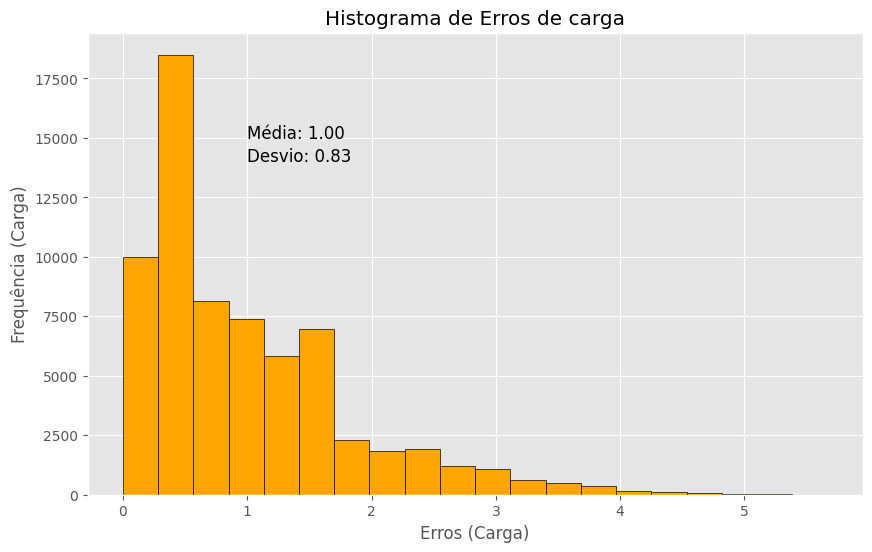

In [135]:
#criando o histograma de erros
plt.figure(figsize=(10,6))
plt.hist(erros_carga, bins=20, ec='black', color='orange')
plt.title('Histograma de Erros de carga')
plt.xlabel('Erros (Carga)')
plt.ylabel('Frequência (Carga)')
#create labels in the graph
plt.text(1, 15000, f'Média: {erros_carga_media:.2f}', fontsize=12)
plt.text(1, 14000, f'Desvio: {erros_carga_desvio:.2f}', fontsize=12)
plt.show()